<a href="https://colab.research.google.com/github/pili-zhangqiu/ML-Summer-School/blob/master/AICore_SC_Lesson04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Getting Started**
**Mounting your GDrive**

By mounting the Drive to your Python notebook, you will be able to read and manipulate files stored in your Google *Drive*.

In [ ]:
# Import the function to mount the Drive
from google.colab import drive

# This line shows that we will be mounting everything stored in the main GDrive folder
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Introduction to Basics of Linear Regression**
**Opening the data file**

In [ ]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Use pandas to read the csv
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/AutoInsurSweden.csv')

# Preview of the dataset
print(df.head(20))

# Create a dependent and independent variable to allocate different feature values
x = np.array(df['number_of_claims'])
y = np.array(df[df.columns[1]])

print()
print(x)
print()
print(y)

    number_of_claims  total_payment(thousands of Swedish Kronor)
0                108                                       392.5
1                 19                                         5.2
2                 13                                        15.7
3                124                                       422.2
4                 40                                       119.4
5                 57                                       170.9
6                 23                                        56.9
7                 14                                        77.5
8                 45                                       214.0
9                 10                                        65.3
10                 5                                        20.9
11                48                                       248.1
12                11                                        23.5
13                23                                        39.6
14                 7     

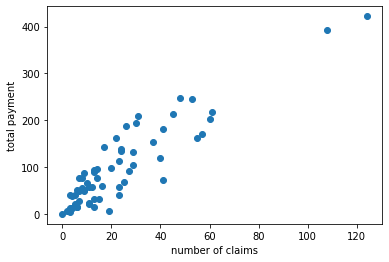

In [ ]:
# plot data
plt.scatter(x,y)
plt.xlabel('number of claims')
plt.ylabel('total payment')
plt.show()

**Explanation on predictions and cost**

In [ ]:
# Define your prediction
def y_predict(x):   # Linear eq: y = 3.5*x
  return 3.5*x

# Calculate your mean squared error (MSE) or cost
# MSE =  1/n * sum_from_0_to_n( (y_i-y_pred_i)^2 )
def mse_cost(y, y_pred):
  diffs = y-y_pred
  squared_diffs = np.square(diffs)
  mean_squared_diff = np.mean(squared_diffs)
  return mean_squared_diff

4.0


mean squared error:  1632.575396825397


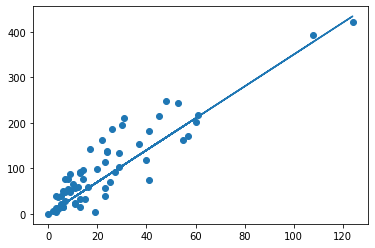

In [ ]:
# Plot y against x. Use the predict function to y_pred, then plot y_pred against x
# on the above plot so you can compare the y against y_pred
y_pred = y_predict(x)
plt.scatter(x,y)    # real values
plt.plot(x, y_pred) # prediction

# Print the MSE or cost
MSE_current = mse_cost(y,y_pred)
print('mean squared error: ',MSE_current)

# **Optimising Our Linear Regression Model**
In this example we will be automatize the process in the section above, by allocating random combinations of values to 'm' and 'b'. Random Search will be used as our optimiser in order to increase our chances of finding the linear function that allows for the minimum cost.

In [ ]:
# Create the random search function
def random_search(n_iterations):
  lowest_cost = float("inf")
  for i in range(n_iterations):
    m = np.random.randn()*5 # random slope values
    b = np.random.randn()*5 # random y-intercept values
    y_pred = m*x+b  # make my prediction using random values of m and b
                    # an equation for a line: y=mx+b
    cost = mse_cost(y,y_pred)
    if cost<lowest_cost:  # only if the current cost is better (lower) than the best one before
      best_m = m  # store the current m value as the new best m value
      best_b = b  # store the current b value as the new best b value
      lowest_cost = cost
  return best_m, best_b, lowest_cost  # return the important values defining the linear regression model

mean squared error:  1367.6609764715272
My linear eq: y =  3.6702669430612076 *x + 10.94892060525543


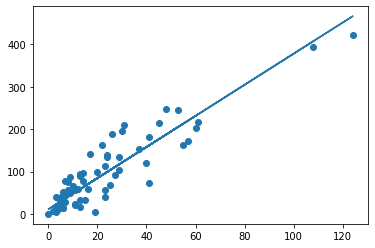

In [ ]:
# Run and plot our best-fitting linear prediction
m, b, cost = random_search(9000)  # I want to try the search random with 10 random guesses

# plot
y_pred = m*x+b
plt.scatter(x,y)    # real values
plt.plot(x, y_pred) # prediction

# Print the MSE or cost
MSE_current = mse_cost(y,y_pred)
print('mean squared error: ',MSE_current)
print('My linear eq: y = ',m,'*x +',b)

# **Optimising Our Linear Regression Model - Example**
In this example we will be automatize the process in the section above, by allocating random combinations of values to 'm' and 'b'. Random Search will be used as our optimiser in order to increase our chances of finding the linear function that allows for the minimum cost.

In [ ]:
# Use pandas to read the csv
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/salary_data.csv')

# Preview of the dataset
print(df.head(20))

# Create a dependent and independent variable to allocate different feature values
x = np.array(df['YearsExperience'])
y = np.array(df[df.columns[1]])

print()
print(x)
print()
print(y)

    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [ ]:
# Create the random search function
def random_search(n_iterations):
  lowest_cost = float("inf")
  for i in range(n_iterations):
    m = np.random.uniform(low=1000, high=15000) # random slope values
    b = np.random.uniform(low=0.5, high=25000) # random y-intercept values
    y_pred = m*x+b  # make my prediction using random values of m and b
                    # an equation for a line: y=mx+b
    cost = mse_cost(y,y_pred)
    if cost<lowest_cost:  # only if the current cost is better (lower) than the best one before
      best_m = m  # store the current m value as the new best m value
      best_b = b  # store the current b value as the new best b value
      lowest_cost = cost
  return best_m, best_b, lowest_cost  # return the important values defining the linear regression model

mean squared error:  36.500745123377605  M
My linear eq: y =  9194.185865501264 *x + 24978.560100165294


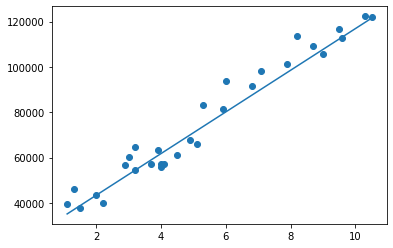

In [ ]:
# Run and plot our best-fitting linear prediction
m, b, cost = random_search(100)  # I want to try the search random with 10 random guesses

# plot
y_pred = m*x+b
plt.scatter(x,y)    # real values
plt.plot(x, y_pred) # prediction

# Print the MSE or cost
MSE_current = mse_cost(y,y_pred)
print('mean squared error: ',MSE_current/10**6,' M')
print('My linear eq: y = ',m,'*x +',b)